# Firma de *commits*.

**ADVERTENCIA:** Este capítulo requiere que se haya creado una firma *GPG* previamente. Las instrucciones para la genreación de firma están en el capítulo de [00_preliminares.ipynb](00_preliminares.ipynb).

## Preliminares:

A fin de contar con un entorno unificado, se utilizará una versión creada previamente del repositorio local llamado ```demo```, el cual se encuentra comprimido en el archivo ```src/demo.zip```. 

In [ ]:
rm -rf demo
unzip -q src/demo.zip
cd demo
git branch

El riesgo de que se inserte código no autorizado en un repositorio es una preocupación constante y tiene múltiples implicaciones de seguridad y seguimiento en un proyecto de desarrollo de software.

Una buena práçtica para proteger los repositorios de este tipo de riesgos es mediante la firma de *commits*, de tal forma que se pueda:

* Garantizar la integridad de los cambios hechos en el *commit*.
* Garantizar la autenticidad del *commit*.
* La identidad del colaborador que realizó el *commit* (no repudio).

La firma de documentos permite aprovechar esquemas de infraestructura de llave pública ([*PKI*](https://es.wikipedia.org/wiki/Infraestructura_de_clave_p%C3%BAblica)) que permitan niveles de confianza razonables. En el caso de *Git*, es posible firmar *tags* y *commits* bajo el formato [*OpenPGP*](https://www.openpgp.org/about/), usando herramientas como [```gpg```](https://gnupg.org/) 

## Firma de commits con  ```git```.

El comando ```git commit``` permite firmar un *commits* mediante la opción ```-s``` o ```--sign```.

```
git commit -s <args>
```

* https://git-scm.com/book/en/v2/Git-Tools-Signing-Your-Work

**Ejemplo:**

* La siguiente celda creará un archivos de texto llamado ```archivo-firmado```.

In [ ]:
echo -e "Hola. Este es un archivo nuevo.\n" > archivo-firmado

In [ ]:
cat  archivo-firmado

* la siguiente celda creará un commit firmado, usando la llave *GPG* creada previamente.

In [ ]:
git add --all
git commit --sign -m "commit firmado"

In [ ]:
git log --show-signature -1

## Gestión de firmas en *GitHub*.

*GitHub* permite gestionar commits firmados usando *GPG*, ```ssh``` o ```MIME```.

* https://docs.github.com/es/authentication/managing-commit-signature-verification/about-commit-signature-verification


### Alta de una llave *GPG* en *GitHub*.

Para dar de alta una llave *GPG*, es necesario extraer la llave pública del usuario.

**Ejemplo**

* La siguiente celda mostrará la *ID* de la llave *GPG* del usuario actual. El resultado será algo similar a lo siguiente:

```
sec   rsa3072/3CC164640A26C4D1 2023-06-01 [SC] [expires: 2025-05-31]
```

* La *ID * en este caso es: ```3CC164640A26C4D1```.

In [ ]:
gpg --list-secret-keys --keyid-format LONG | grep -i ^sec

* Ahora es necesario ejecutar la siguiente celda, sustituyendo ```<PONGA SU ID AQUÍ>``` por la *ID* del usuario actual con el fin de crear la llave  pública.
* El resultado será algo similar a lo siguiente:

```
-----BEGIN PGP PUBLIC KEY BLOCK-----

mQGNBGR4bOUBDADqu3/OPn+g7pat18gtUrF55RZfxF6rjonhJlBLSMhTYizhdY+e
IsRVviYIE8HcZFSwU2ogK97SzSrFMj8sSn1UJ5vJOv4dkCG3aOHCb1g+1iLWfDOn
RzOwFiTec00m1ZQaYuTgLy1RTnryhsUTpWI9b0AFbcbKoO3QKo/ksg9ct9hPq1kd
sENvLDtPma02vphQanE6U5n74ckX4eBRpd5T4Z0SLcLHyPDKXEJX4lgV3nzu1XkF
zehyNhM4EiBrUddPSg3VV6VzYJtMQD2Ka6AUdAaLacdbHf5GBnsY+XZwPRRE195T
XfR1qXxR9t4F29Z+pVhBFdFtSbCW0EYbMgRwmEahsXYjaxK8b5awcpQsmKfAkyEq
...
...
-----END PGP PUBLIC KEY BLOCK-----
```

In [ ]:
gpg --armor --export <PONGA SU ID AQUÍ>

* Es necesario acceder a la cuenta del usuario en *Github* en la configuracion de llaves *SSH* y *GPG* y seleccionar el botón ```New GPG Key```.

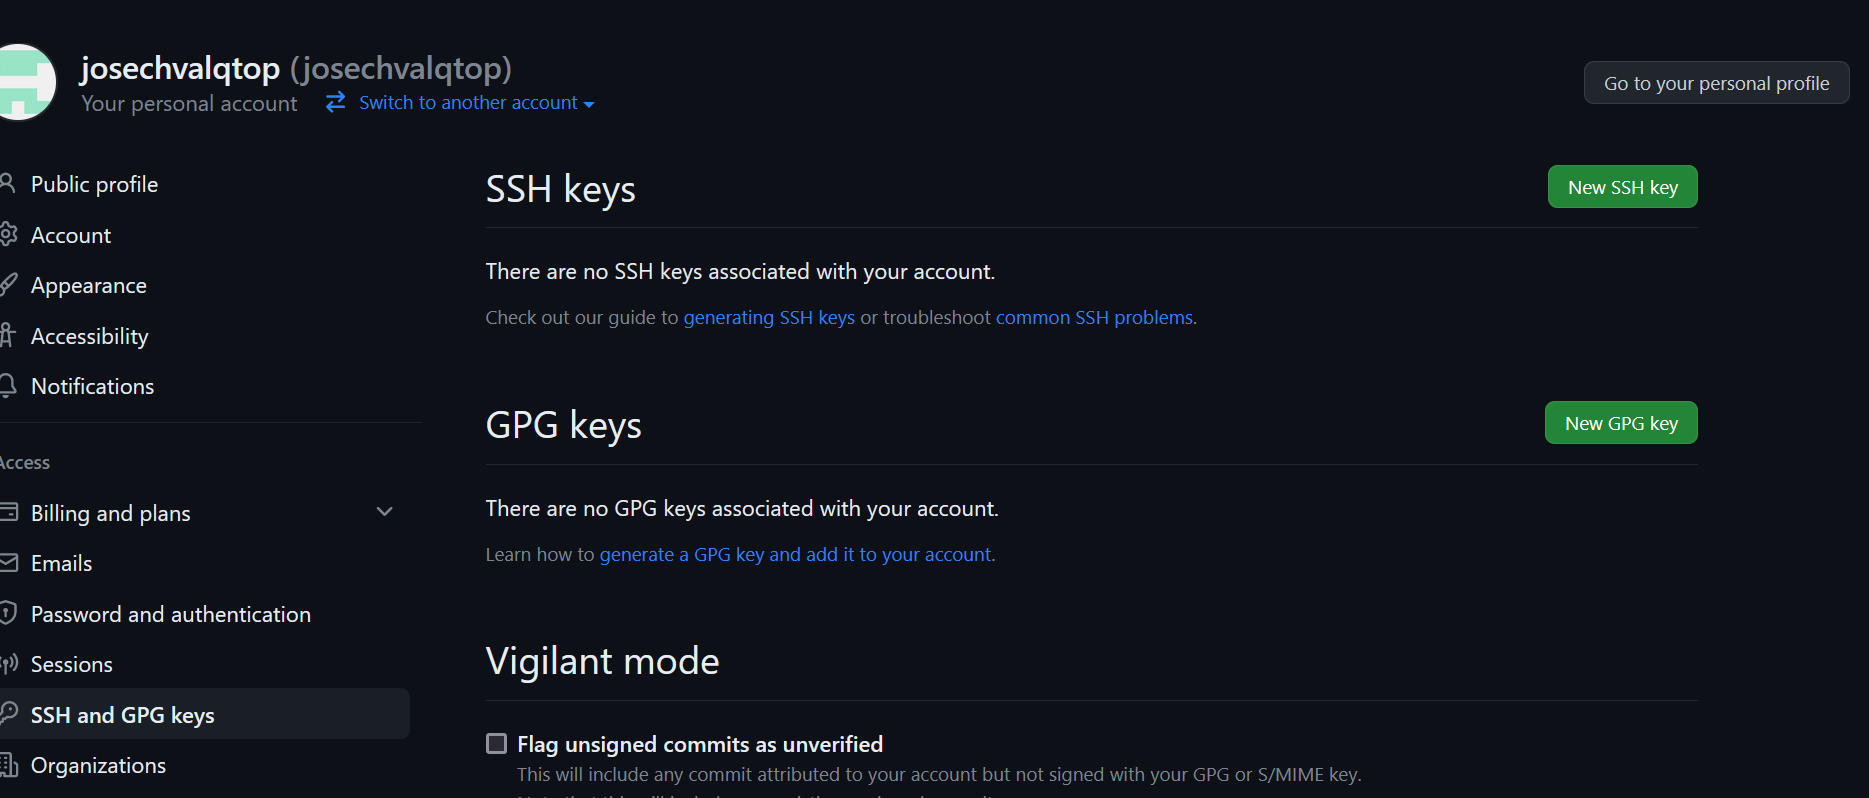

* Es necesario darle un nombre a la nueva llave y pegar la llave pública que se extrajo previamente.
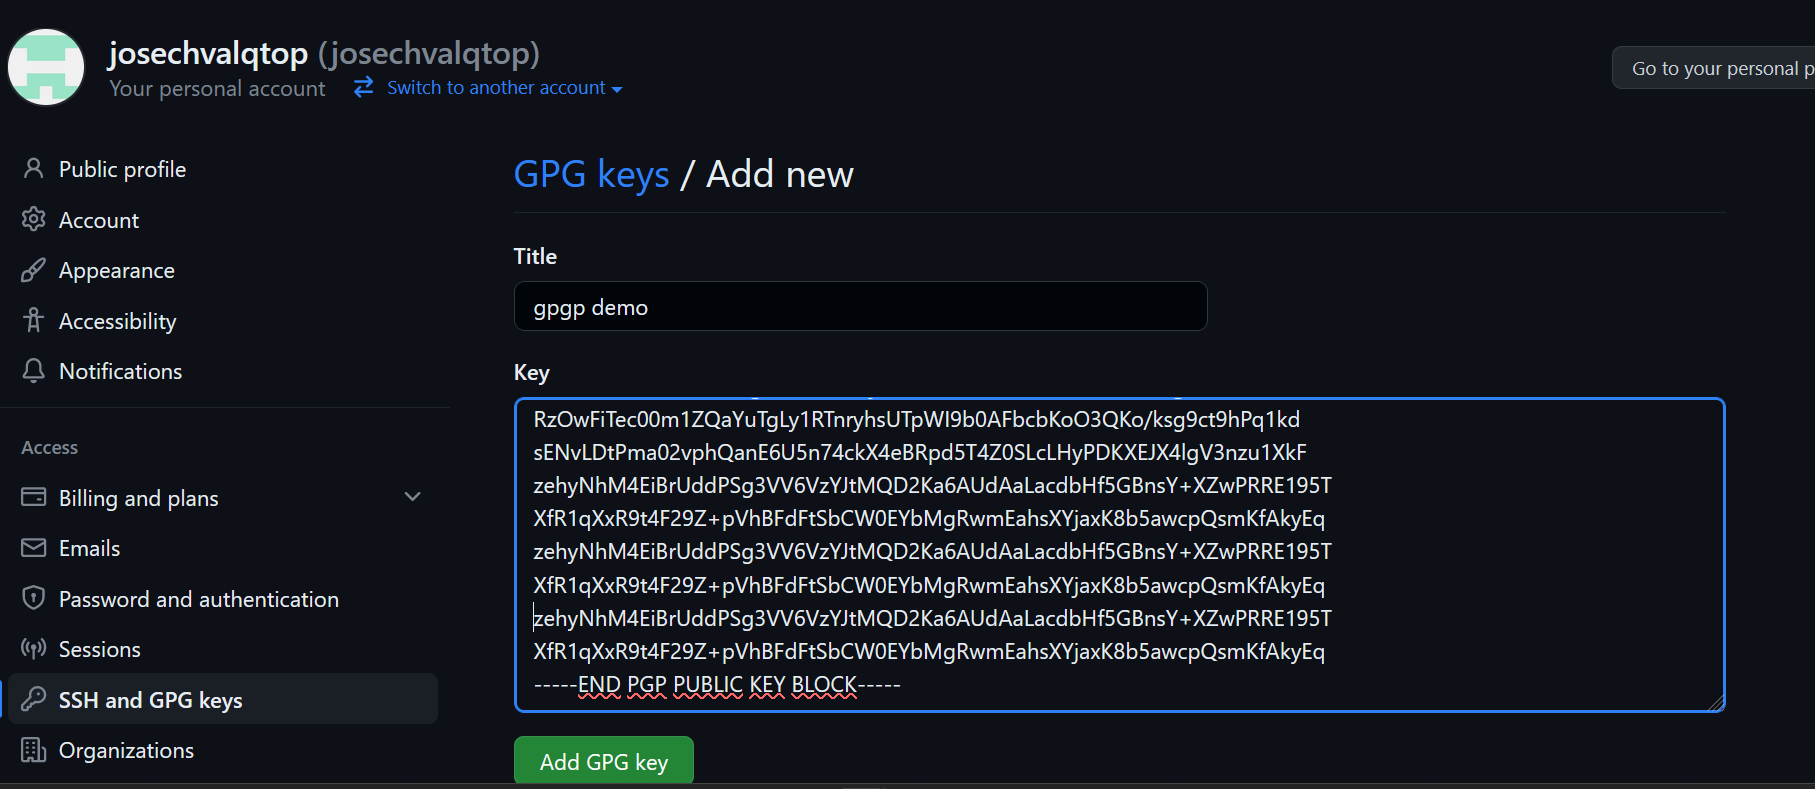

### Validación de commits firmados.

En la misma sección de ```SSH and GPG keys```, es posible activar la opción ```Vigilant Mode```, la cual mostrará una etiqueta que denote si un commit fue firmado o no.

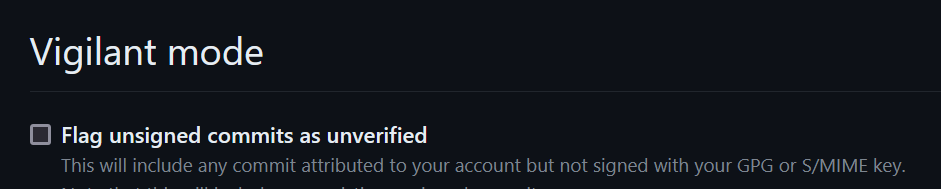

* En la siguiente imagen se pueden apreciar un *commits* que no fue firmado, denotado por el rótulo ```Unverified```.

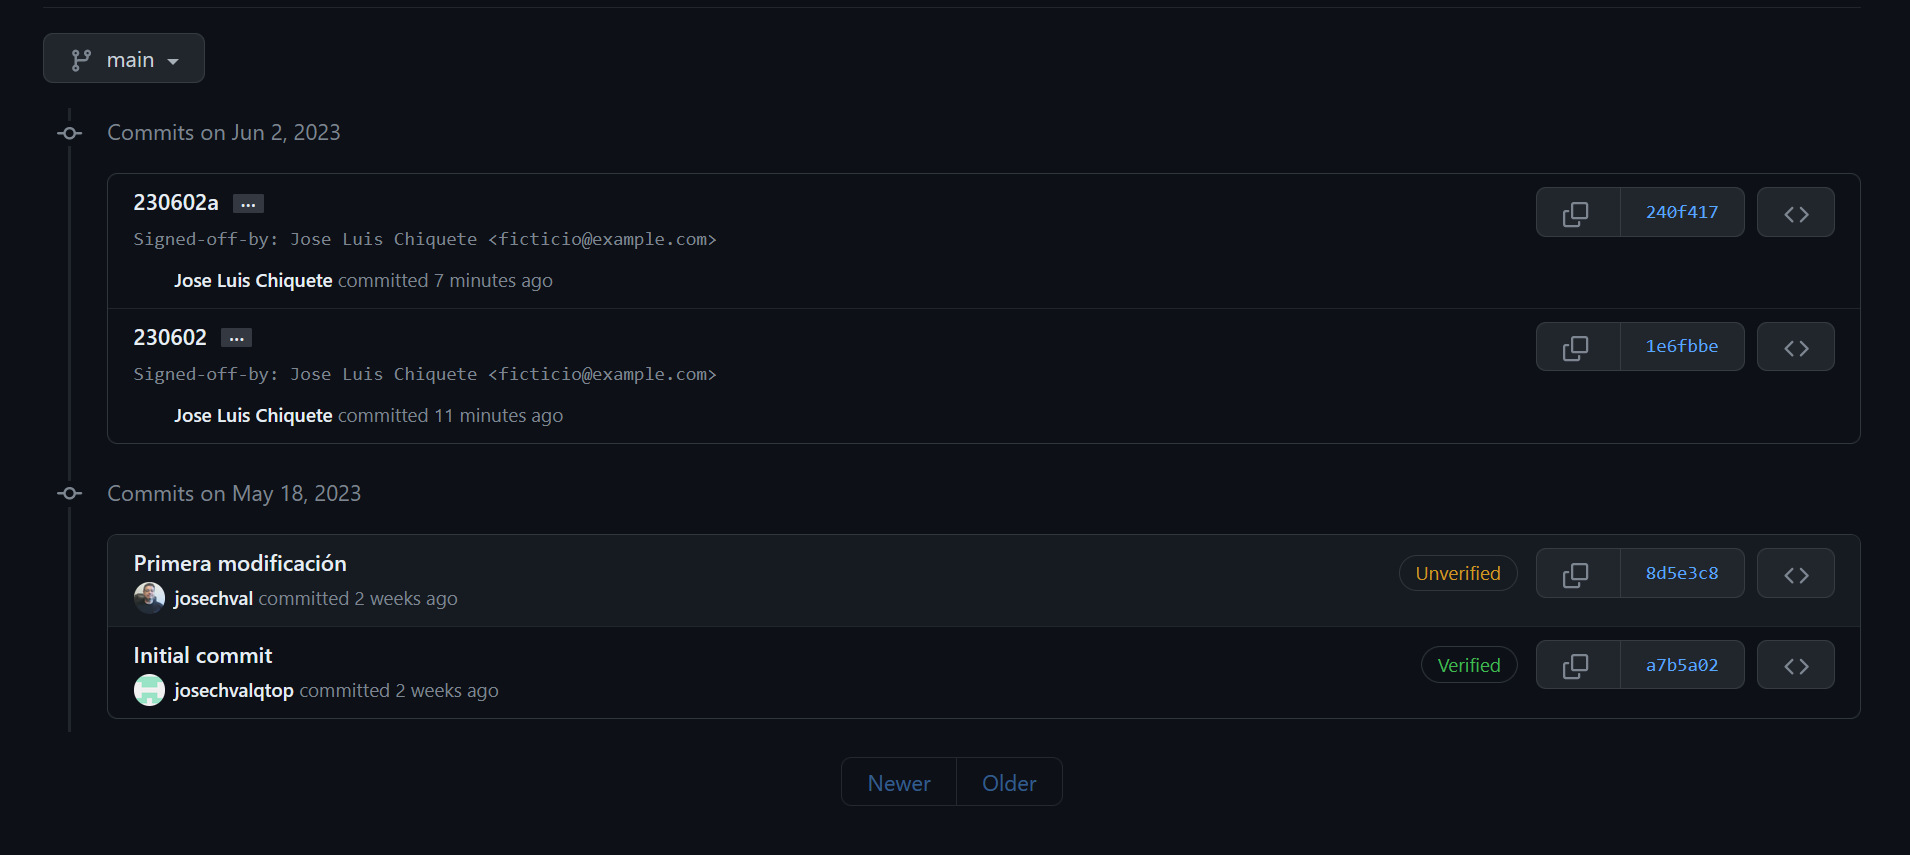

<p style="text-align: center"><a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Licencia Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/80x15.png" /></a><br />Esta obra está bajo una <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Licencia Creative Commons Atribución 4.0 Internacional</a>.</p>
<p style="text-align: center">&copy; José Luis Chiquete Valdivieso. 2023.</p>